In [1]:
%load_ext autoreload
%autoreload 2
from configs import project_config
import matplotlib.pyplot as plt
from src.classes.ClassFractionalSin import FractionalSin
from tqdm import tqdm
import numpy as np
import math
from scipy.special import eval_laguerre
from configs.RecursiveVPSDE.Markovian_fSin.recursive_Markovian_fSinWithPosition_T256_H05_tl_5data import get_config

# From A ridge estimator of the drift from discrete repeated observations of the solutions of a stochastic differential equation (Denis et al 2021)

In [2]:
config = get_config()

In [3]:
def rmse_ignore_nans(y_true, y_pred):
    assert (y_true.shape == y_pred.shape and len(y_pred.shape) == 1)
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    mask = ~np.isnan(y_true) & ~np.isnan(y_pred)  # Ignore NaNs in both arrays
    return np.sqrt(np.mean((y_true[mask] - y_pred[mask]) ** 2))

In [4]:
num_paths = 100000
num_time_steps = int(256)
isUnitInterval = True
mean_rev = config.mean_rev
diff = config.diffusion
initial_state = 0.
rvs = None
H = config.hurst
deltaT = 1./ (256)
t0 = 0.
t1 = deltaT*num_time_steps
space_scale = 1.

In [5]:
save_path = (
        project_config.ROOT_DIR + f"experiments/results/TS_benchmark_fSin_DriftEvalExp_{round(1, 4)}KN_{num_paths}NPaths").replace(
    ".", "")

In [13]:
vispaths = np.load(save_path + "_IIDRidge_ispaths.npy").flatten()
is_true_drift = np.load(save_path + "_IIDRidge_isdriftTrue.npy")
is_drift = np.load(save_path + "_IIDRidge_isdriftHats.npy")

In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
vispaths[vispaths < -1.7] = np.nan
vispaths[vispaths > 0.1] = np.nan
is_true_drift[vispaths < -1.7] = np.nan
is_true_drift[vispaths > 0.1] = np.nan
is_drift[vispaths < -1.7] = np.nan
is_drift[vispaths > 0.1] = np.nan
plt.scatter(vispaths, is_true_drift, s=10,label="True Drift", color="red")
plt.scatter(vispaths, is_drift, s=10,label="Estimated Drift", color="blue")
plt.legend(fontsize=18)
rmse = (rmse_ignore_nans(is_drift, is_true_drift))
plt.title(f"IS RMSE {round(rmse, 4)} Ridge Estimator with {100000} Paths", fontsize=24)
ax.tick_params(labelsize=14)
plt.ylabel("Drift Value", fontsize=18)
plt.xlabel(r"State $X$", fontsize=18)
plt.legend(fontsize=18)
plt.show()
plt.close()

In [6]:
vispaths = np.load(save_path + "_IIDRidge_oospaths.npy").flatten()
oos_true_drift = np.load(save_path + "_IIDRidge_oosdriftTrue.npy")
oos_drift = np.load(save_path + "_IIDRidge_oosdriftHats.npy")
print((rmse_ignore_nans(oos_true_drift, oos_drift)))

0.029684865966109832


In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
vispaths[vispaths < -1.7] = np.nan
vispaths[vispaths > 0.1] = np.nan
oos_true_drift[vispaths < -1.7] = np.nan
oos_true_drift[vispaths > 0.1] = np.nan
oos_drift[vispaths < -1.7] = np.nan
oos_drift[vispaths > 0.1] = np.nan
plt.scatter(vispaths, oos_true_drift, s=10,label="True Drift", color="red")
plt.scatter(vispaths, oos_drift, s=10,label="Estimated Drift", color="blue")
rmse = (rmse_ignore_nans(oos_true_drift, oos_drift))
plt.title(f"OOS RMSE {round(rmse, 4)} Ridge Estimator with {100000} Paths", fontsize=24)
ax.tick_params(labelsize=14)
plt.ylabel("Drift Value", fontsize=18)
plt.xlabel(r"State $X$", fontsize=18)
plt.legend(fontsize=18)
plt.show()
plt.close()

In [6]:
vispaths = np.load(save_path + "_IIDRidge_unifpaths.npy").flatten()
unif_true_drift = np.load(save_path + "_IIDRidge_unifdriftTrue.npy")
unif_drift = np.load(save_path + "_IIDRidge_unifdriftHats.npy")

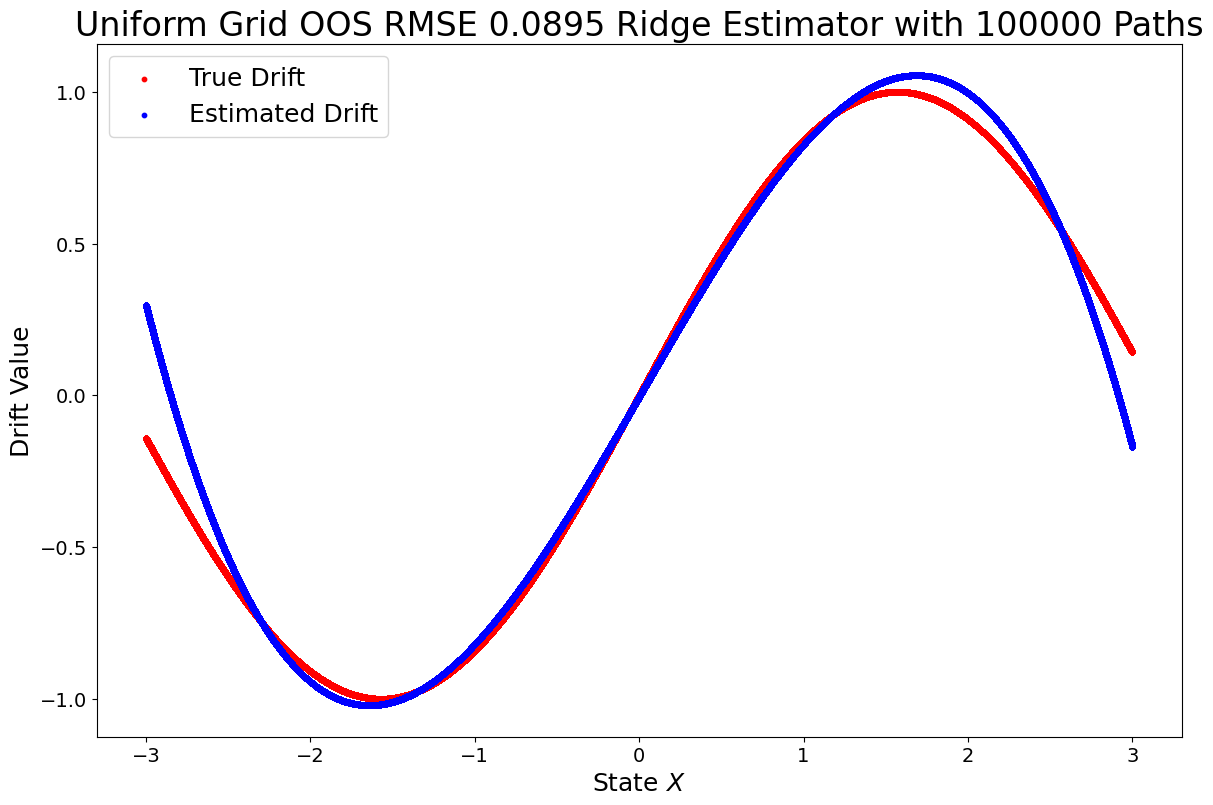

In [7]:
fig, ax = plt.subplots(figsize=(14,9))
#vispaths[vispaths < -1.7] = np.nan
#vispaths[vispaths > 0.1] = np.nan
#unif_true_drift[vispaths < -1.7] = np.nan
#unif_true_drift[vispaths > 0.1] = np.nan
#unif_drift[vispaths < -1.7] = np.nan
#unif_drift[vispaths > 0.1] = np.nan
plt.scatter(vispaths, unif_true_drift, label="True Drift", s=10, color="red")
plt.scatter(vispaths, unif_drift, label="Estimated Drift", s=10,color="blue")
rmse = (rmse_ignore_nans(unif_true_drift, unif_drift))
plt.title(f"Uniform Grid OOS RMSE {round(rmse, 4)} Ridge Estimator with {100000} Paths", fontsize=24)
ax.tick_params(labelsize=14)
plt.ylabel("Drift Value", fontsize=18)
plt.xlabel(r"State $X$", fontsize=18)
plt.legend(fontsize=18)
plt.show()
plt.close()